In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo 

In [2]:
# 1. Load the Heart Disease UCI dataset into a Pandas DataFrame.

# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# examine data
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [3]:
# 2. Handle missing values through removal.
print(f"number of missing values before cleaning is: {X.isnull().sum().sum()}")

rows_removed = X[X.isnull().any(axis = 1)].index
X_cleaned = X.dropna()

y_cleaned = y.drop(rows_removed)
print(f"number of missing values after cleaning is: {X_cleaned.isnull().sum().sum()}")

number of missing values before cleaning is: 6
number of missing values after cleaning is: 0


In [4]:
categorical_cols = ["cp", "restecg", "slope", "thal"]

# 3. Perform one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Preview the result
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_2,cp_3,cp_4,restecg_1,restecg_2,slope_2,slope_3,thal_6.0,thal_7.0
0,63,1,145,233,1,150,0,2.3,0.0,False,False,False,False,True,False,True,True,False
1,67,1,160,286,0,108,1,1.5,3.0,False,False,True,False,True,True,False,False,False
2,67,1,120,229,0,129,1,2.6,2.0,False,False,True,False,True,True,False,False,True
3,37,1,130,250,0,187,0,3.5,0.0,False,True,False,False,False,False,True,False,False
4,41,0,130,204,0,172,0,1.4,0.0,True,False,False,False,True,False,False,False,False


In [5]:
#4. Standardize numerical features using StaandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_cleaned)

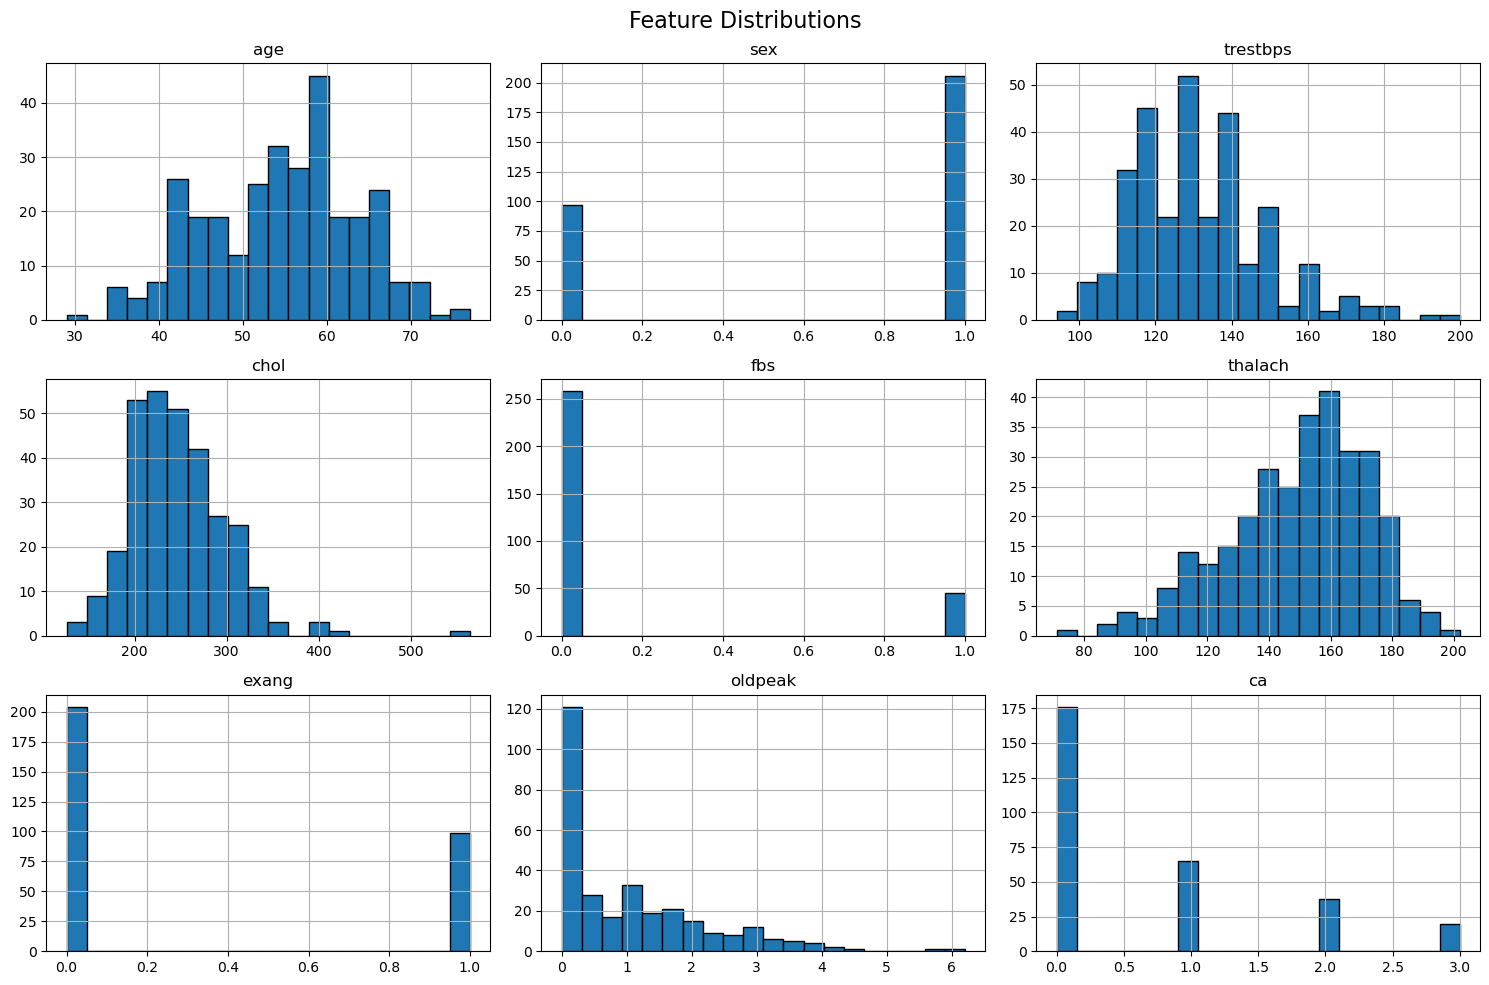

In [6]:
#5. Conduct Exploratory Data Analysis (EDA) with histograms, correlation heatmaps,and boxplots
import matplotlib.pyplot as plt #HISTOGRAM

X_encoded.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


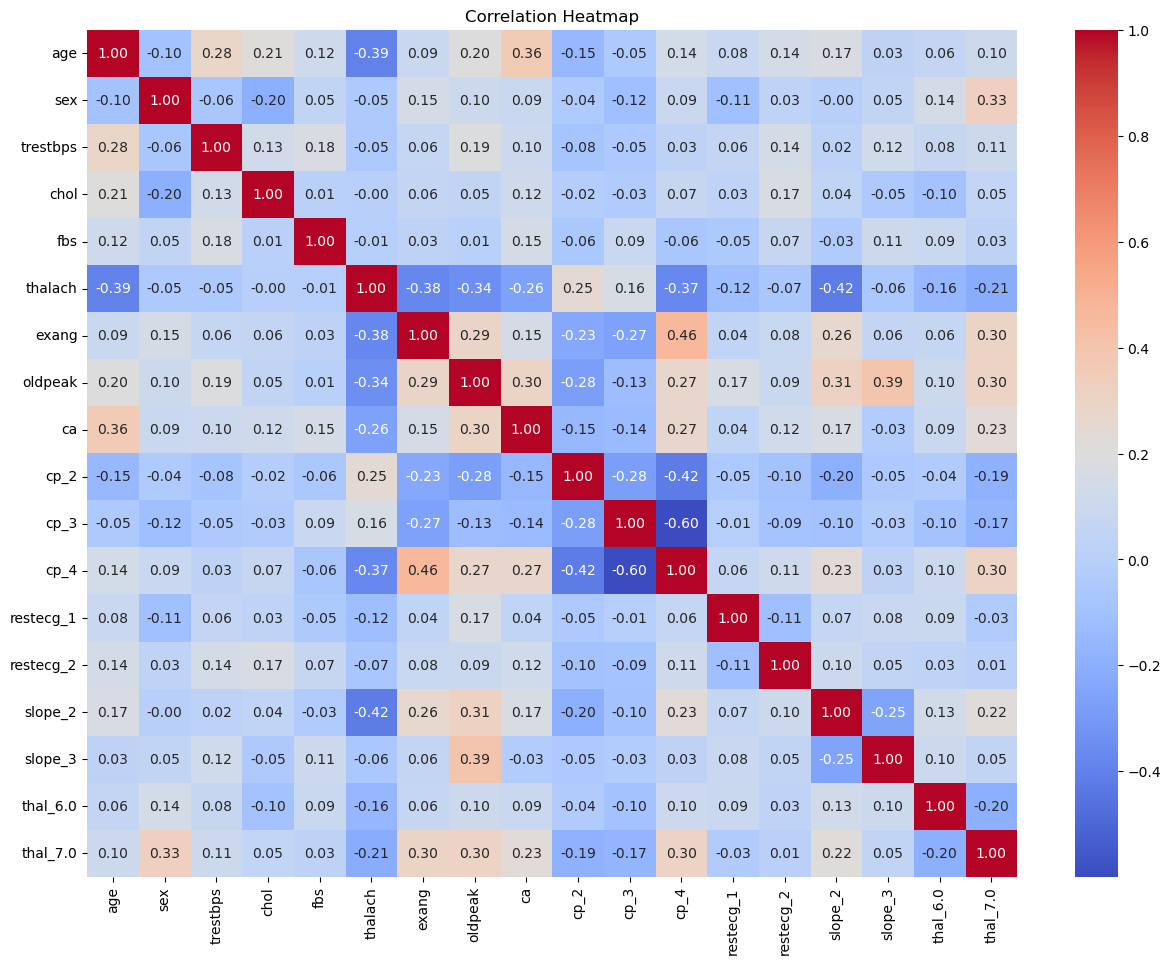

In [7]:
import seaborn as sns #HEATMAP

plt.figure(figsize=(15,11))
corr_matrix=X_encoded.corr()
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

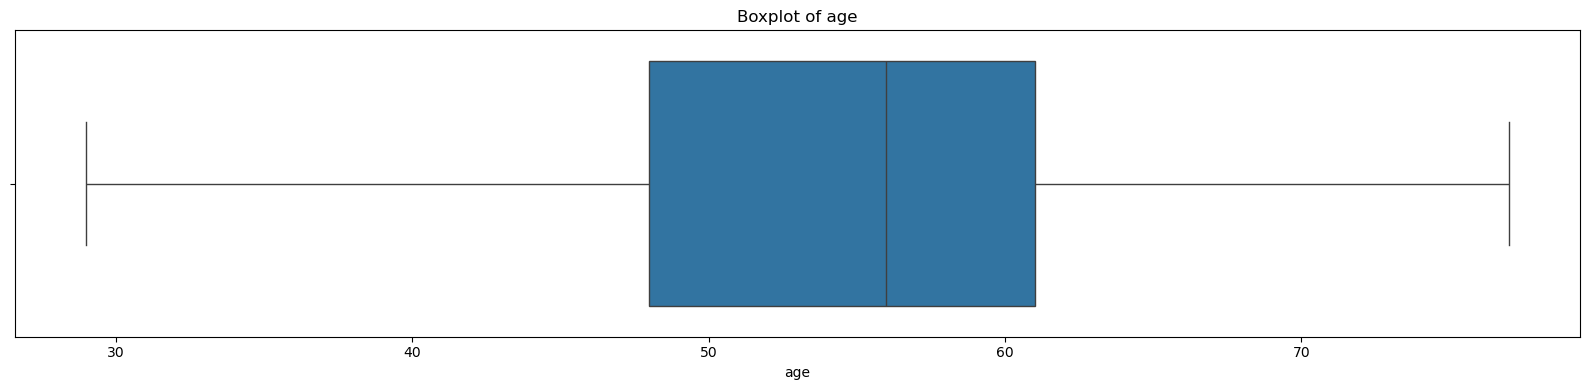

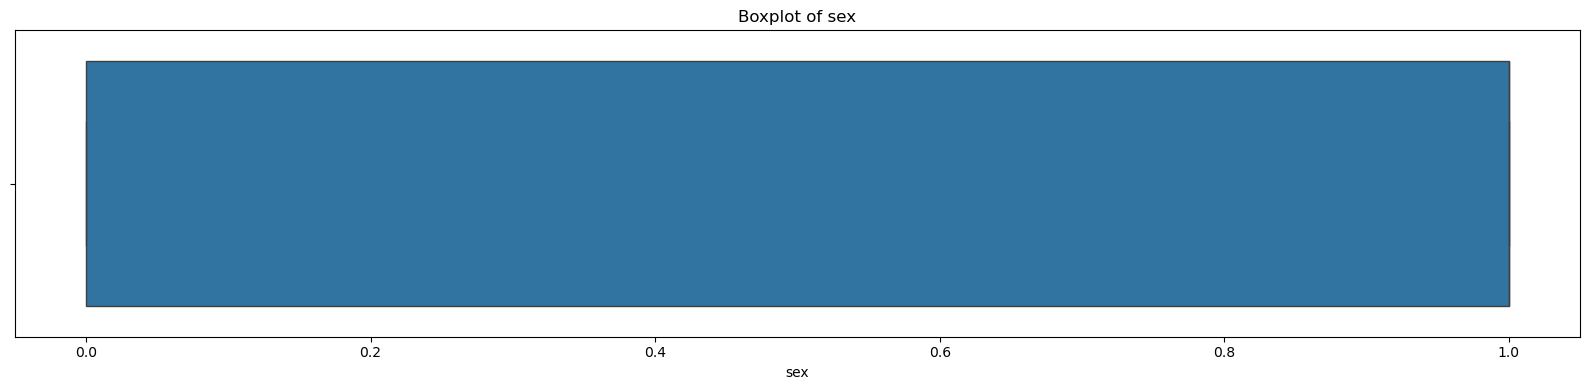

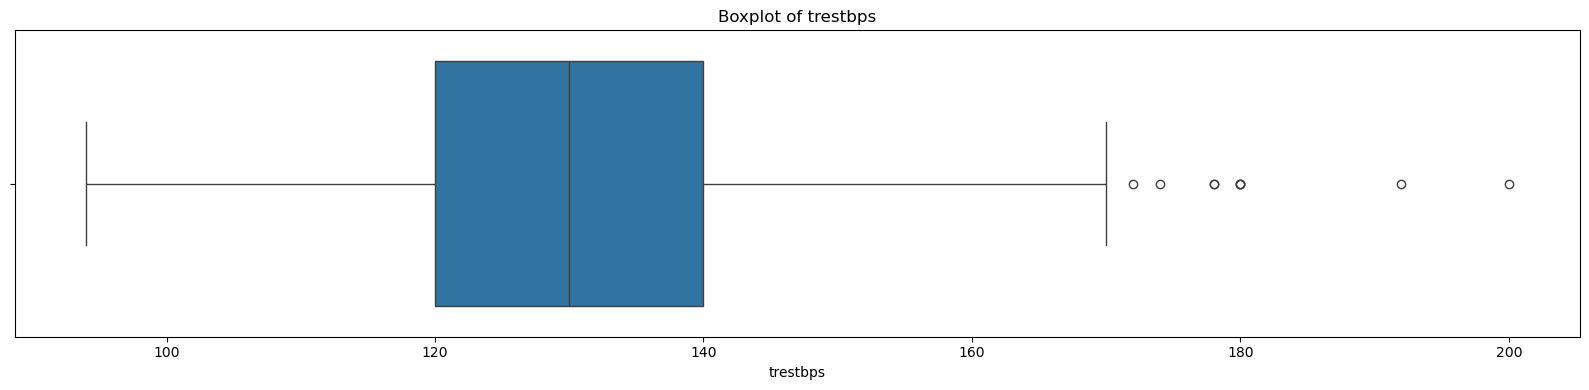

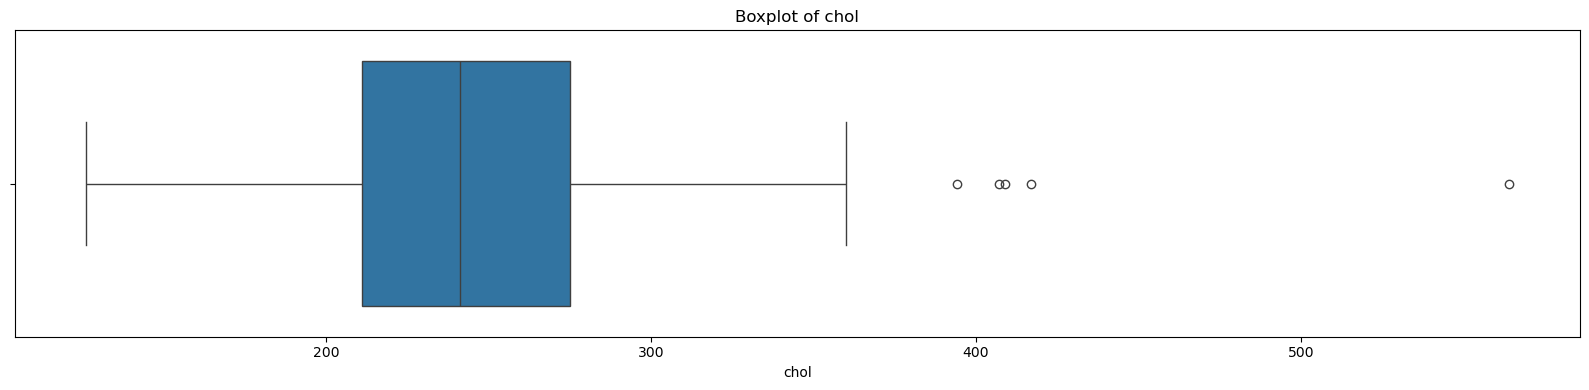

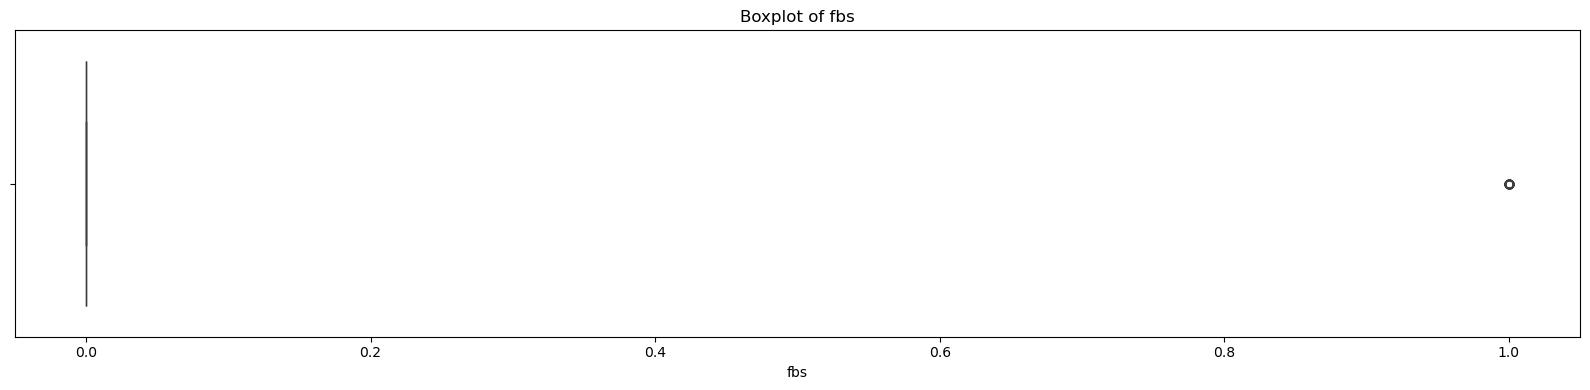

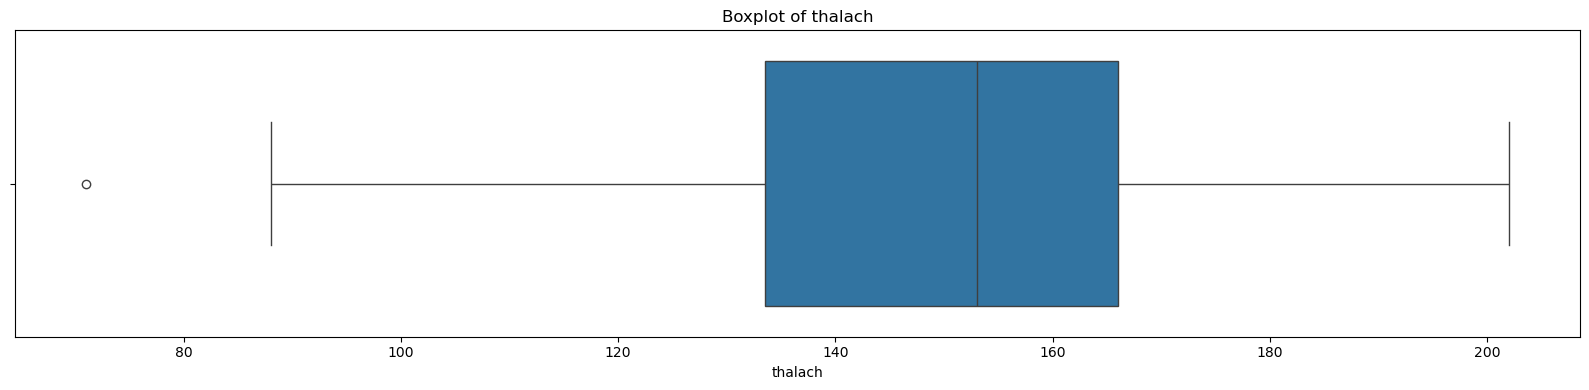

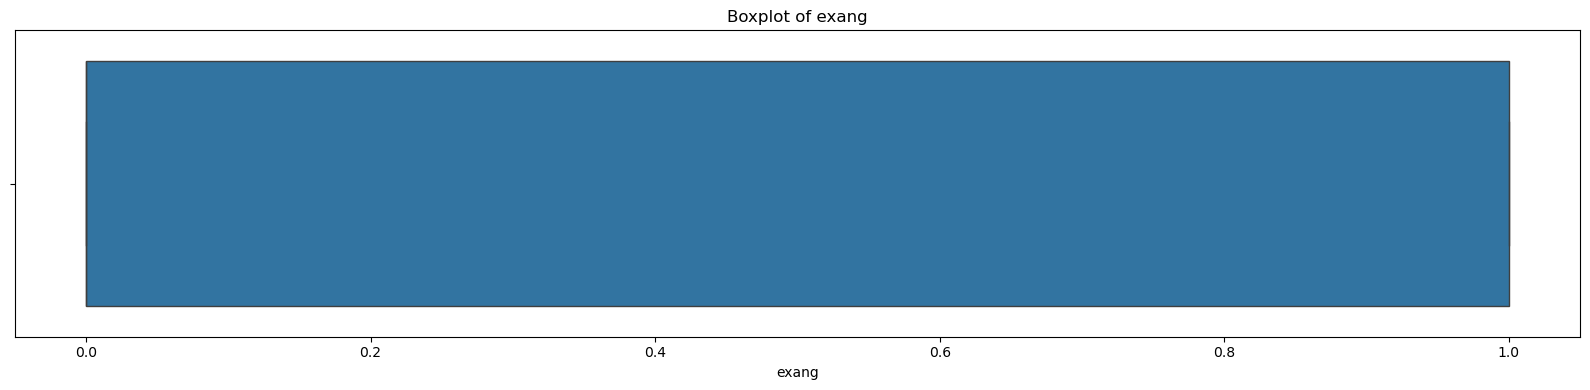

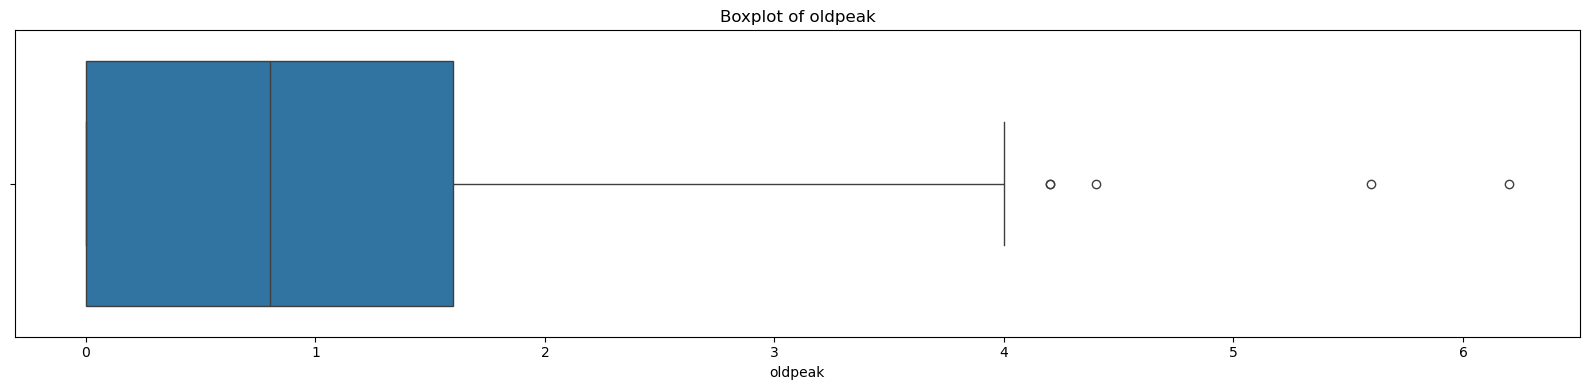

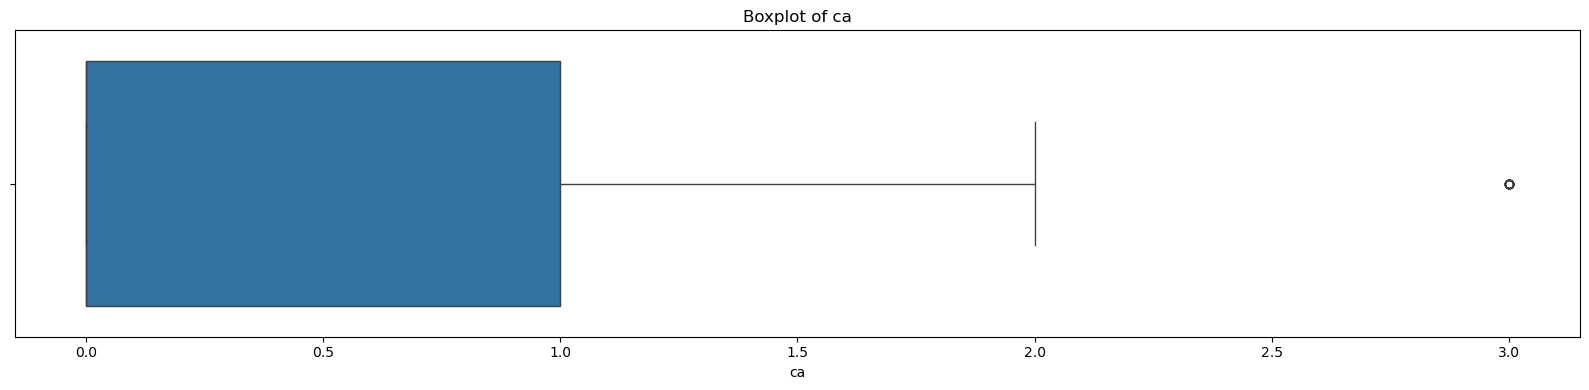

In [8]:
#BOXPLOTS FOR EACH FEATURE
for col in X_encoded.select_dtypes(include='number').columns:
    plt.figure(figsize=(16, 4))
    sns.boxplot(x=X_encoded[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()
